In [1]:
%pip install tensorflow tensorflow-gpu

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ba/7c/b971f2485155917ecdcebb210e021e36a6b65457394590be01cc61515310/tensorflow-2.13.0-cp310-cp310-win_amd64.whl.metadata
  Using cached tensorflow-2.13.0-cp310-cp310-win_amd64.whl.metadata (2.6 kB)
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [50 lines of output]
      Traceback (most recent call last):
        File "C:\Users\blaik\AppData\Local\Temp\pip-build-env-6y2hnz2h\overlay\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
        File "C:\Users\blaik\AppData\Local\Temp\pip-build-env-6y2hnz2h\overlay\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
        File "C:\Users\blaik\AppData\Local\Temp\pip-build-env-6y2hnz2h\overlay\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
        File "C:\Users\blaik\AppData\Local\Temp\pip-build-env-6y2hnz2h\overlay\Lib\site-packages\

In [18]:
%pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ba/7c/b971f2485155917ecdcebb210e021e36a6b65457394590be01cc61515310/tensorflow-2.13.0-cp310-cp310-win_amd64.whl.metadata
  Using cached tensorflow-2.13.0-cp310-cp310-win_amd64.whl.metadata (2.6 kB)
  Obtaining dependency information for tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/40/fa/98115f6fe4d92e1962f549917be2dc8e369853b7e404191996fedaaf4dd6/tensorflow_intel-2.13.0-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
  Obtaining dependency information for h5py>=2.9.0 from https://files.pythonhosted.org/packages/e2/c4/6f8dae1530d57a6122fd5b72c750187484acbe612f630cb2179e4bcb12c1/h5py-3.9.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for libclang>=13.0.0 from https://files.pythonhosted.org/packages/02/8c/dc970bc00867fe290e8c8a7befa1635af716a9ebdfe3fb9dce0ca4b522ce/libclang-16.0.6-

In [2]:
%pip install mediapipe

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

keypoints


In [4]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [5]:
def mediapipe_detection(image,model):
    cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    result  = model.process(image)
    image.flags.writeable = True
    cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, result



In [6]:
def draw_landmarks(image, result):
    mp_drawing.draw_landmarks(image,result.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
    mp_drawing.draw_landmarks(image, result.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, result.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(220,44,100), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=1, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(220,44,100), thickness=1, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=1, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(220,44,100), thickness=1, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=1, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(220,44,100), thickness=1, circle_radius=2)
                             ) 

In [8]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    try:
        while cap.isOpened():
            ret, frame  = cap.read()

            image, result = mediapipe_detection(frame, holistic)

            draw_styled_landmarks(image, result)

            cv2.imshow('opencv feed', image)

            if cv2.waitKey(10) & 0xFF == ord('q') :
                break
    except Exception as e:
        print(e)
        cap.release()
        cv2.destroyAllWindows()

    cap.release()
    cv2.destroyAllWindows()

EXTRACTING KEYPOINTS

In [11]:
HAND_LANDMARKS = 21 * 3
POSE_LANDMARKS = 33 * 4
FACE_LANDMARKS = 468 * 3

In [8]:
#getting the flattened array for the LSTM model and errpr handling for when features not in frame
def extract_keypoints(result):
    face = np.array([[res.x, res.y, res.z] for res in result.face_landmarks.landmark]).flatten() if result.face_landmarks else np.zeros(FACE_LANDMARKS)
    lh = np.array([[res.x, res.y, res.z] for res in result.left_hand_landmarks.landmark]).flatten() if result.left_hand_landmarks else np.zeros(HAND_LANDMARKS)
    rh = np.array([[res.x, res.y, res.z] for res in result.right_hand_landmarks.landmark]).flatten() if result.right_hand_landmarks else np.zeros(HAND_LANDMARKS)
    pose = np.array([[res.x, res.y, res.z,res.visibility] for res in result.pose_landmarks.landmark]).flatten() if result.pose_landmarks else np.zeros(POSE_LANDMARKS)
    return np.concatenate([face,lh,rh,pose])

In [11]:
len(extract_keypoints(result))

1662

In [12]:
np.zeros(3)

array([0., 0., 0.])

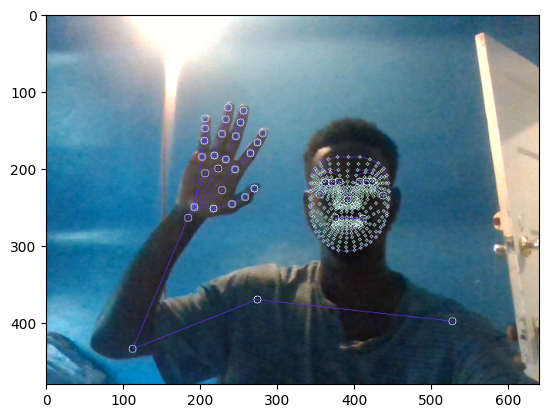

In [13]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

FOLDERS FOR COLLECTIONS

In [9]:
DATA_PATH = os.path.join('MP_data')
actions = np.array(['hello','thanks','iloveyou'])

#number of videos
no_of_sequence = 30

#length of frames
sequence_length = 30

In [15]:
#creating directories for each frame of video of each action:done
for action in actions:
    for sequence in range(no_of_sequence):
        try :
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass


trainning anf test for keypoint 

In [16]:
cap = cv2.VideoCapture(0)
flag = True

with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    for action in actions:

        for sequence in range(no_of_sequence):
            if flag == False:
                break
            for frame_num in range(sequence_length):
                if flag == False:
                    break

                try:
                    ret, frame  = cap.read()

                    image, result = mediapipe_detection(frame, holistic)

                    draw_styled_landmarks(image, result)

                    if frame_num == 0:
                        cv2.putText(image,'STARTING COLLECTION', (120,200),
                        cv2.FONT_HERSHEY_SIMPLEX,1,(220,0,0),2, cv2.LINE_AA)

                        cv2.putText(image,'Collectin frames for {} and video number {}'.format (action,sequence), (15,14),
                        cv2.FONT_HERSHEY_SIMPLEX,0.5,(220,0,0),1, cv2.LINE_AA)

                        cv2.waitKey(5000)

                    else:
                        cv2.putText(image,'Collectin frames for {} and video number{}'.format (action,sequence), (15,12),
                        cv2.FONT_HERSHEY_SIMPLEX,0.5,(220,0,0),1, cv2.LINE_AA)

                    keypoints = extract_keypoints(result)
                    frame_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                    np.save(frame_path,keypoints)


                    cv2.imshow('opencv feed', image)

                    if cv2.waitKey(10) & 0xFF == ord('q') :
                        flag = False
                        break


                except Exception as e:
                    print(e)
                    cap.release()
                    cv2.destroyAllWindows()

    cap.release()
    cv2.destroyAllWindows()

Preprocess data

In [19]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [22]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [27]:
#gathering data from directories for training LSTM

sequences,labels = [],[]

for action in actions:
    
    for sequence_num in range(no_of_sequence):
        window = []

        for frame in range(sequence_length):

            res = np.load(os.path.join(DATA_PATH, action, str(sequence), '{}.npy'.format(frame)))

            window.append(res)

        sequences.append(window)
        labels.append(label_map[action])

In [35]:
np.array(sequences).shape

(90, 30, 1662)

In [36]:
X = np.array(sequences)

In [37]:
y = to_categorical(labels).astype(int)
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [38]:
x_train,x_test, y_train, y_test = train_test_split(X,y, test_size=.05)

training LSTM

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [40]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [41]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [42]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])


In [43]:
model.fit(x_train, y_train, epochs=2000, callbacks=[tb_callback])


Epoch 1/2000
3/3 [==============================] - 16s 169ms/step - loss: 1.4958 - categorical_accuracy: 0.2000
Epoch 2/2000
3/3 [==============================] - 0s 142ms/step - loss: 1.0539 - categorical_accuracy: 0.3647
Epoch 3/2000
3/3 [==============================] - 0s 146ms/step - loss: 0.8324 - categorical_accuracy: 0.4706
Epoch 4/2000
3/3 [==============================] - 0s 137ms/step - loss: 0.5957 - categorical_accuracy: 0.6706
Epoch 5/2000
3/3 [==============================] - 0s 154ms/step - loss: 0.2898 - categorical_accuracy: 0.8824
Epoch 6/2000
3/3 [==============================] - 1s 181ms/step - loss: 0.6922 - categorical_accuracy: 0.9176
Epoch 7/2000
3/3 [==============================] - 1s 167ms/step - loss: 0.1101 - categorical_accuracy: 1.0000
Epoch 8/2000
3/3 [==============================] - 0s 147ms/step - loss: 0.1684 - categorical_accuracy: 0.9059
Epoch 9/2000
3/3 [==============================] - 0s 158ms/step - loss: 0.3304 - categorical_accuracy

In [50]:
pred = model.predict(x_test)

1/1 [==============================] - 0s 446ms/step


In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 596675 

In [59]:
actions[np.argmax(pred[3])]

'hello'

In [73]:
np.argmax(y_test, axis = 1)

Signature: np.argmax(a, axis=None, out=None, *, keepdims=<no value>)
Source:   
@array_function_dispatch(_argmax_dispatcher)
def argmax(a, axis=None, out=None, *, keepdims=np._NoValue):
    """
    Returns the indices of the maximum values along an axis.

    Parameters
    ----------
    a : array_like
        Input array.
    axis : int, optional
        By default, the index is into the flattened array, otherwise
        along the specified axis.
    out : array, optional
        If provided, the result will be inserted into this array. It should
        be of the appropriate shape and dtype.
    keepdims : bool, optional
        If this is set to True, the axes which are reduced are left
        in the result as dimensions with size one. With this option,
        the result will broadcast correctly against the array.

        .. versionadded:: 1.22.0

    Returns
    -------
    index_array : ndarray of ints
        Array of indices into the array. It has the same shape as `a.shape

saving model/weights

In [64]:
model.save('sign_model.keras')

Evaluation

In [66]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [86]:
yhat = model.predict(x_test)

1/1 [==============================] - 0s 154ms/step


In [87]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()


In [4]:
multilabel_confusion_matrix(ytrue, yhat)

NameError: name 'multilabel_confusion_matrix' is not defined

In [85]:
accuracy_score(ytrue,yhat)

1.0

In [13]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

Real Time Evaluation

In [25]:
from tensorflow.keras.models import load_model

model = load_model('sign_model.keras')

In [1]:

sequence = []
sentence = []
threshold = 0.8
predictions = []

cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    try:
        while cap.isOpened():
            ret, frame  = cap.read()

            image, result = mediapipe_detection(frame, holistic)

            draw_styled_landmarks(image, result)

            #detection model 
            keypoints = extract_keypoints(result)
            sequence.append(keypoints)
            sequence = sequence[-30:]

            if len(sequence) == 30:
                res = model.predict(np.expand_dims(sequence,axis =0))[0]
                print(actions[np.argmax(res)])
                predictions.append(np.argmax(res))

################################viz
                if np.unique(predictions[-10:])[0]==np.argmax(res):
                    if res[np.argmax(res)] > threshold: 
                        if len(sentence) > 0: 
                            if actions[np.argmax(res)] != sentence[-1]:
                                sentence.append(actions[np.argmax(res)])
                        else:
                            sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

                # Viz probabilities
            image = prob_viz(res, actions, image, colors)
                
            cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
            cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
#####################################viz

            cv2.imshow('opencv feed', image)

            if cv2.waitKey(10) & 0xFF == ord('q') :
                break
    except Exception as e:
        print(e)
        cap.release()
        cv2.destroyAllWindows()

    cap.release()
    cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

In [131]:
res[np.argmax(res)]

1.0